## Lab 8a - mining and analysis of internet data

From the [Canadian Historical Weather Database](http://climate.weather.gc.ca/historical_data/search_historic_data_e.html) download all the **daily** weather data for the Calgary International Airport **(CALGARY INTL A)** and the Edmonton International Airport **(EDMONTON INTL A)** for the years 2014, 2015, 2016, 2017 and 2018. 

Write code to load this data, so that you can access the daily max temperature, min temperature, mean termperature, total rain, total snow and total precipitation. 

## (1) Make three plots

for the daily (a) max, (b) min, (c) mean temperatures for Calgary (horizonal) vs. Edmonton (vertical).  Include in your plot both a linear and quadratic least-squares interpolation.  Give your plots appropriate titles.  Include a legend describing the point plot, as well as the least square interpolation. 

Does your plot settle the age old dispute of whether or not Edmonton or Calgary is **colder**?

In [13]:
import os as os
import fnmatch as fn
import collections as co

files = fn.filter(os.listdir('./data'), "*.csv")
import datetime as dt
# print(files)

def fmtline(ln):
    PL = ln.translate({ord(c): None for c in '"\n'})
    PL = PL.split(",")
    return(PL)

initDat = co.defaultdict(dict)

for file in files:
    print(file)
    with open('./data/'+file, encoding='utf-8') as f:
        content = f.readlines()

        ## find line describing columns
        keylines = [i for i in range(len(content)) if 'date/time' in content[i].lower()]
        if len(keylines)!=1:
            print("Error: "+wd+'/'+wdf+" key error. ")
            () = () + 1 ## cute way to get jupyter to crash.

        ## find station data
        stnlines = [i for i in range(len(content)) if 'station name' in content[i].lower()]
        if len(stnlines)!=1:
            print("Error: "+wd+'/'+wdf+" stn name error. ")
            () = () + 1

        airpt = fmtline(content[stnlines[0]])[1]
        keys = fmtline(content[keylines[0]])
        ## get date/time index
        dti = [j for j in range(len(keys)) if 'date/time' in keys[j].lower()]
        if len(dti)!=1:
            print("Error: "+wd+'/'+wdf+' date/time idx. ')
            () = () + 1

        ## let's collect the data
        for i in range(keylines[0]+1, len(content)):
            ln = fmtline(content[i])
            ## convert date/time to python datetime object
            ln[dti[0]] = dt.datetime.strptime(ln[dti[0]], "%Y-%m-%d")
            initDat[airpt][ln[dti[0]]] = dict( [ (keys[j] , ln[j]) for j in range(len(keys)) if j != dti[0] ] )

eng-daily-01012015-12312015(1).csv
eng-daily-01012017-12312017.csv
eng-daily-01012016-12312016(1).csv
eng-daily-01012018-12312018(1).csv
eng-daily-01012015-12312015.csv
eng-daily-01012016-12312016.csv
eng-daily-01012014-12312014(1).csv
eng-daily-01012014-12312014.csv
eng-daily-01012017-12312017(1).csv
eng-daily-01012018-12312018.csv


In [14]:
print(initDat.keys())
## weather stations

dict_keys(['CALGARY INTL A', 'EDMONTON INTL A'])


In [15]:
print(list(initDat["EDMONTON INTL A"].keys())[0].date())

2017-01-01


In [16]:
airpts = list(initDat.keys())
for A in airpts:
    ## print out first and last dates in the initDat[A]
    DTL = sorted(initDat[A].keys())
    print(DTL[0], DTL[-1], end=' ')
    print(A)
    ## check for missing data. 
    ## collect all dates with missing data
    Dt = DTL[0]
    while Dt<DTL[-1]:
        if Dt not in DTL:
            print("Missing ", dt)
        Dt += dt.timedelta(days=1)
## essentially complete data set

2014-01-01 00:00:00 2018-12-31 00:00:00 CALGARY INTL A
2014-01-01 00:00:00 2018-12-31 00:00:00 EDMONTON INTL A


In [17]:
## merging dictionaries
## use the update() command
## this moves all the entries from a 2nd dictionary into the 1st
edmdict = dict()
calgdict = dict()
for k in initDat.keys():
    if 'EDM' in k:
        edmdict.update(initDat[k])
    if 'CALG' in k:
        calgdict.update(initDat[k])
print(len(edmdict))
print(len(calgdict))

1826
1826


In [18]:
## this part was not in lecture. We use it to remove dates
## where we do not have temperature measurements.
ncl = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)']

## set of dates w/measurements
edmdt = set([k for k,d in edmdict.items() if len(d[ncl[0]])!=0\
              and len(d[ncl[1]])!=0 and len(d[ncl[2]])!=0])
calgdt = set([k for k,d in calgdict.items() if len(d[ncl[0]])!=0\
              and len(d[ncl[1]])!=0 and len(d[ncl[2]])!=0])

comdt = edmdt.intersection(calgdt)
coml = sorted(comdt)

## clean data
dictlist = [edmdict, calgdict]


In [19]:
## let's sort all the dates and use that sorted list as our indexing
sdt = sorted(coml)
print(type(sdt))

<class 'list'>


In [20]:
print(sdt[0])
print(type(edmdict[sdt[0]]['Max Temp (°C)']))
print(edmdict[sdt[0]]["Min Temp (°C)"])

2014-01-01 00:00:00
<class 'str'>
-19.7


In [35]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# ## Calgary max temp on x-axis
# Y1 = [float(edmdict[x]['Max Temp (°C)']) for x in sdt]
# X1 = [float(calgdict[x]['Max Temp (°C)']) for x in sdt]
# # plt.figure(figsize=(12,12))
# # plt.plot(X1, Y1, 'r1',label="Temperature")
# # plt.title("Edmonton vs Calgary max Temp")
# # plt.xlabel("Calgary Max Temp (Celsius)")
# # plt.ylabel("Edmonton Max Temp (Celsius)")
# # plt.legend()
# # plt.show()


# ## Calgary Min temp on x-axis
# Y2 = [float(edmdict[x]['Min Temp (°C)']) for x in sdt]
# X2 = [float(calgdict[x]['Min Temp (°C)']) for x in sdt]
# # plt.figure(figsize=(12,12))
# # plt.plot(X2, Y2, 'b1',label="Temperature")
# # plt.title("Edmonton vs Calgary Min Temp")
# # plt.xlabel("Calgary Min Temp (Celsius)")
# # plt.ylabel("Edmonton Min Temp (Celsius)")
# # plt.legend()
# # plt.show()

# ## Calgary Mean temp on x-Axis
# Y3 = [float(edmdict[x]['Mean Temp (°C)']) for x in sdt]
# X3 = [float(calgdict[x]['Mean Temp (°C)']) for x in sdt]
# # plt.figure(figsize=(12,12))
# # plt.plot(X3, Y3, 'k1',label="Temperature")
# # plt.title("Edmonton vs Calgary Mean Temp")
# # plt.xlabel("Calgary Mean Temp (Celsius)")
# # plt.ylabel("Edmonton Mean Temp (Celsius)")
# # plt.legend()
# # plt.show()

In [36]:
## numpy matrices
import numpy as np
## Quadratic fit:
Aq1 = np.matrix([[1.0, x1, x1**2] for x1 in X1]).T
Aq2 = np.matrix([[1.0, x2, x2**2] for x2 in X2]).T
Aq3 = np.matrix([[1.0, x3, x3**2] for x3 in X3]).T
print(Aq1.shape,Aq2.shape,Aq3.shape)
yq1 = np.matrix(Y1).T
yq2 = np.matrix(Y2).T
yq3 = np.matrix(Y3).T
print(yq1.shape,yq2.shape,yq2.shape)
cq1 = np.linalg.inv(Aq1*Aq1.T)*Aq1*yq1
cq2 = np.linalg.inv(Aq2*Aq2.T)*Aq2*yq2
cq3 = np.linalg.inv(Aq3*Aq3.T)*Aq3*yq3
## Linear fit:
Al1 = np.matrix([[1.0, x1] for x1 in X1]).T
Al2 = np.matrix([[1.0, x2] for x2 in X2]).T
Al3 = np.matrix([[1.0, x3] for x3 in X3]).T
print(Al1.shape,Al2.shape,Al3.shape)
yl1 = np.matrix(Y1).T
yl2 = np.matrix(Y2).T
yl3 = np.matrix(Y3).T
print(yl1.shape,yl2.shape,yl2.shape)
cl1 = np.linalg.inv(Al1*Al1.T)*Al1*yl1
cl2 = np.linalg.inv(Al2*Al2.T)*Al2*yl2
cl3 = np.linalg.inv(Al3*Al3.T)*Al3*yl3

(3, 1792) (3, 1792) (3, 1792)
(1792, 1) (1792, 1) (1792, 1)
(2, 1792) (2, 1792) (2, 1792)
(1792, 1) (1792, 1) (1792, 1)


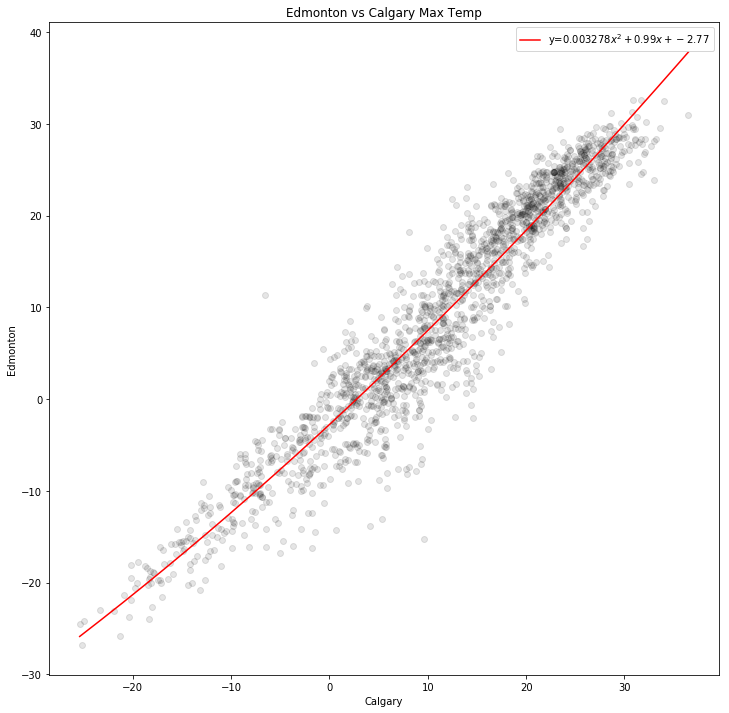

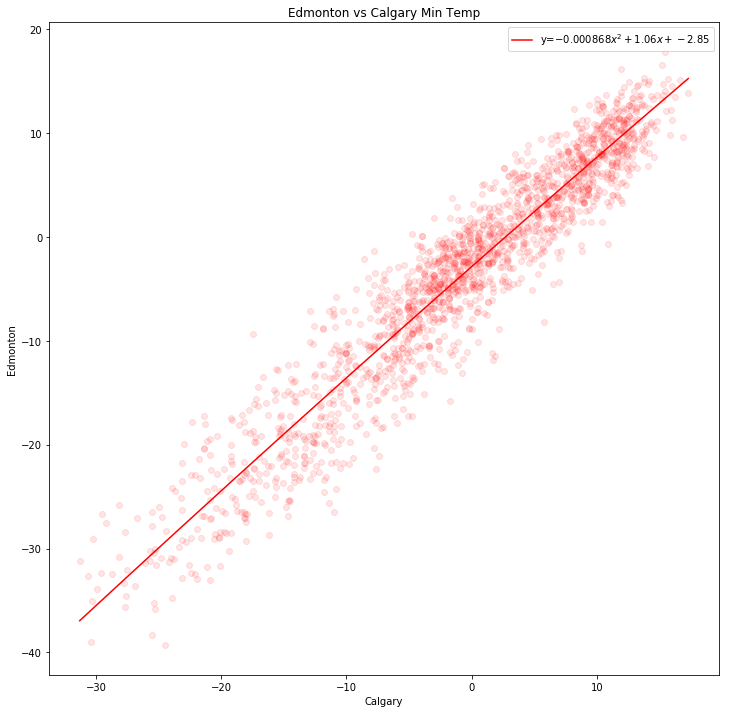

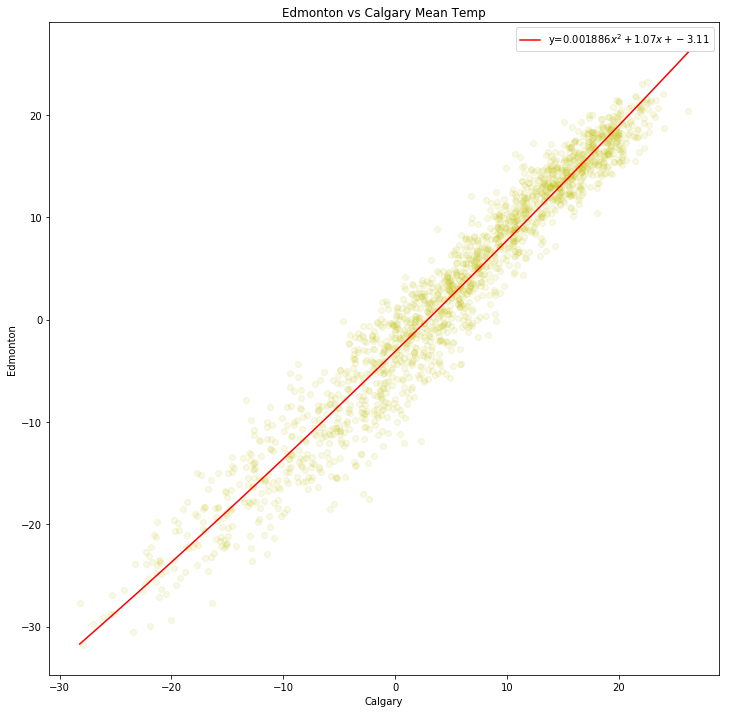

In [37]:
plt.figure(figsize=(12,12))
plt.title("Edmonton vs Calgary Max Temp")
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X1, Y1, c='k', alpha=0.1)
dom = np.linspace(min(X1), max(X1), 1000)
ran = [cq1[0,0] + cq1[1,0]*x1 + cq1[2,0]*x1**2 for x1 in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(cq1[2,0],cq1[1,0], cq1[0,0]))
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.title("Edmonton vs Calgary Min Temp")
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X2, Y2, c='r', alpha=0.1)
dom = np.linspace(min(X2), max(X2), 1000)
ran = [cq2[0,0] + cq2[1,0]*x2 + cq2[2,0]*x2**2 for x2 in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(cq2[2,0],cq2[1,0], cq2[0,0]))
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.title("Edmonton vs Calgary Mean Temp")
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X3, Y3, c='y', alpha=0.1)
dom = np.linspace(min(X3), max(X3), 1000)
ran = [cq3[0,0] + cq3[1,0]*x3 + cq3[2,0]*x3**2 for x3 in dom]
plt.plot(dom, ran, 'r-', label='y=$%2.6fx^2+%2.2fx+%2.2f$' %(cq3[2,0],cq3[1,0], cq3[0,0]))
plt.legend()
plt.show()



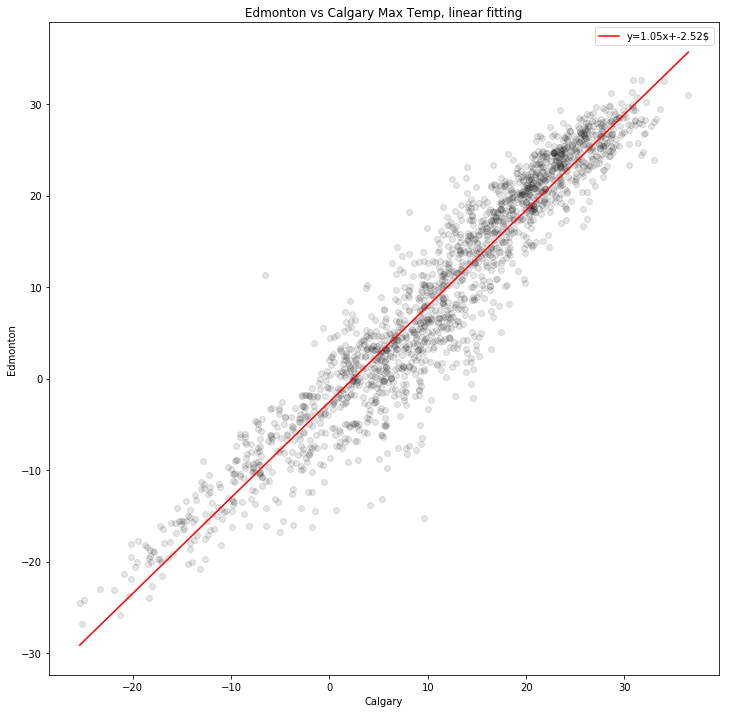

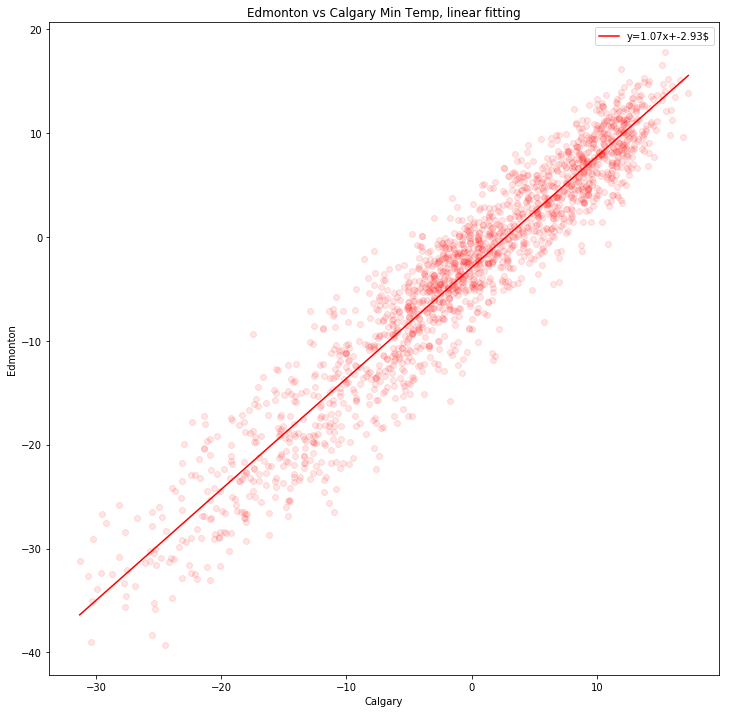

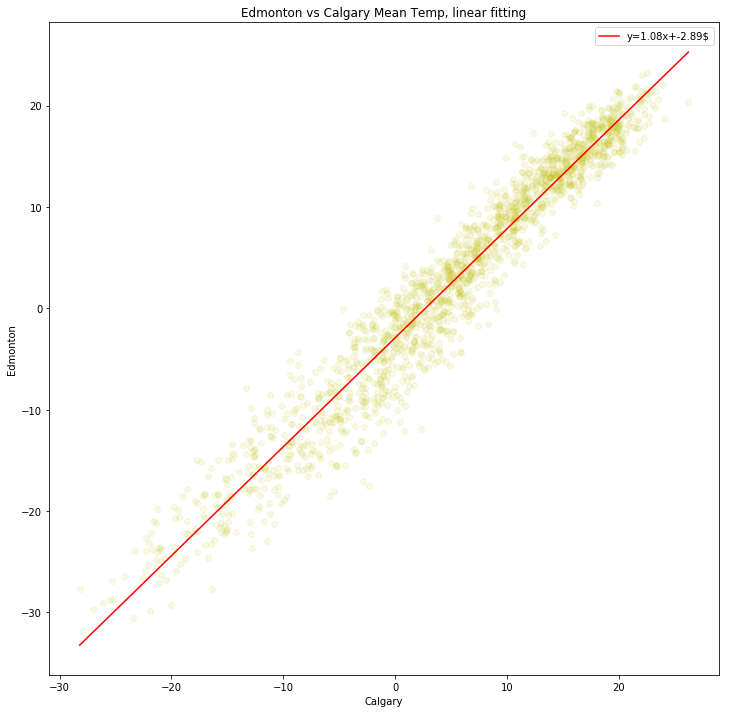

In [31]:
plt.figure(figsize=(12,12))
plt.title("Edmonton vs Calgary Max Temp, linear fitting")
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X1, Y1, c='k', alpha=0.1)
dom = np.linspace(min(X1), max(X1), 1000)
ran = [cl1[0,0] + cl1[1,0]*x1 for x1 in dom]
plt.plot(dom, ran, 'r-', label='y=%2.2fx+%2.2f$' %(cl1[1,0],cl1[0,0]))
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.title("Edmonton vs Calgary Min Temp, linear fitting")
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X2, Y2, c='r', alpha=0.1)
dom = np.linspace(min(X2), max(X2), 1000)
ran = [cl2[0,0] + cl2[1,0]*x2 for x2 in dom]
plt.plot(dom, ran, 'r-', label='y=%2.2fx+%2.2f$' %(cl2[1,0],cl2[0,0]))
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.title("Edmonton vs Calgary Mean Temp, linear fitting")
plt.xlabel("Calgary")
plt.ylabel("Edmonton")
plt.scatter(X3, Y3, c='y', alpha=0.1)
dom = np.linspace(min(X3), max(X3), 1000)
ran = [cl3[0,0] + cl3[1,0]*x3 for x3 in dom]
plt.plot(dom, ran, 'r-', label='y=%2.2fx+%2.2f$' %(cl3[1,0],cl3[0,0]))
plt.legend()
plt.show()


 * * *

## (2) For the years 2014--2018, plot 

 * (a) the average total precipitation, by month for Edmonton.  
 
 * (b) Similarly, in another plot give the average total precipitation, by month, for Calgary. 
 
i.e. each plot will have **12** bars, labelled by the name of the month.  The bar height will be the average precipitation for that month over the stated five year period. You can access ASCII strings for the month names via the **datetime** library.  Here is the link for the [barplot call](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html). 

In plot (a) for the months where Edmonton's precipitation exceeds Calgary's, make the bar red.  Make the remaining bars blue. Similarly, in plot (b) if Calgary's precipitation exceeds Edmonton's make the bar red, and blue when it does not.

In [172]:
len(sdt)

1792

In [181]:
edm_precip=[]
calg_precip=[]
for m in range(1,13):
    month=[]
    PrecipE=[]
    PrecipC=[]
    for i in range(len(sdt)):
        if sdt[i].month == m:
            month.append(sdt[i])
    for dt in month:
        try:
            PrecipE.append(float(edmdict[dt]['Total Precip (mm)']))
            PrecipC.append(float(calgdict[dt]['Total Precip (mm)']))
        except ValueError:
            pass
    edm_precip.append(round(sum(PrecipE)/4,3))
    calg_precip.append(round(sum(PrecipC)/4,3))
print("Edm: ",edm_precip,"\n","Cgy: ",calg_precip,"\n",sep="")

Edm: [15.65, 15.3, 27.7, 34.25, 51.4, 75.675, 104.875, 52.125, 66.175, 26.225, 25.3, 13.7]
Cgy: [19.675, 16.975, 20.1, 33.825, 50.675, 76.5, 93.85, 76.65, 50.05, 25.425, 28.5, 21.8]



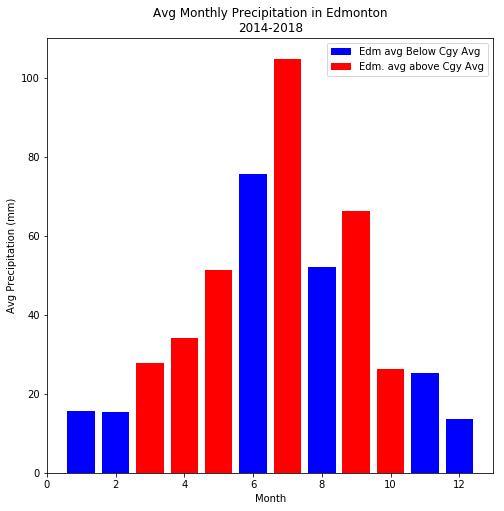

In [217]:
## Plot a:
import matplotlib.pyplot as plt
import numpy as np
tru=[]
for i in range(len(edm_precip)):
    if calg_precip[i]<edm_precip[i]:
        tru.append(1)
    else:
        tru.append(0)
plt.figure(figsize=(8,8))
plt.title('Avg Monthly Precipitation in Edmonton\n2014-2018')
plt.xlabel('Month')
plt.ylabel('Avg Precipitation (mm)')
plt.bar(range(1,13),edm_precip, label="Edm avg Below Cgy Avg",color='Blue')
plt.bar(range(1,13),np.array(tru)*np.array(edm_precip),color='red', label="Edm. avg above Cgy Avg")
plt.legend()
plt.show()

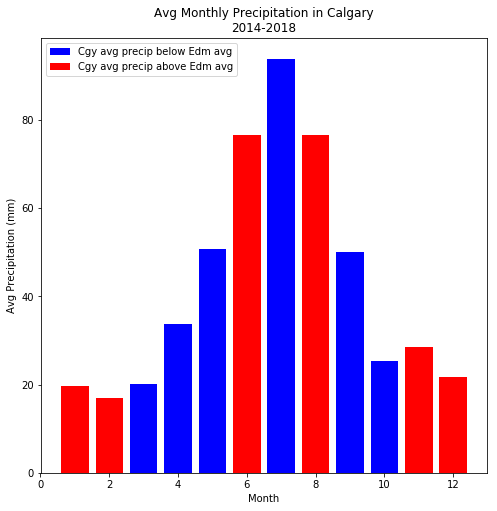

In [219]:
## Plot b:
import matplotlib.pyplot as plt
import numpy as np
tru=[]
for i in range(len(edm_precip)):
    if calg_precip[i]>edm_precip[i]:
        tru.append(1)
    else:
        tru.append(0)
plt.figure(figsize=(8,8))
plt.title('Avg Monthly Precipitation in Calgary\n2014-2018')
plt.xlabel('Month')
plt.ylabel('Avg Precipitation (mm)')
plt.bar(range(1,13),calg_precip, label="Cgy avg precip below Edm avg",color='Blue')
plt.bar(range(1,13),np.array(tru)*np.array(calg_precip),color='red', label="Cgy avg precip above Edm avg")
plt.legend()
plt.show()